In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Conv2D, Flatten,Dropout,Activation,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image


import sklearn 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
import os


import PIL
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt
from os import listdir
from matplotlib import image
import natsort
from natsort import natsorted
from os import listdir
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import cv2
import os


In [9]:
#Exploratory Data Analysis
#Data preparation
#Load data

FTIR_data_cal = pd.read_excel('/content/drive/MyDrive/Moisture.xlsx' , sheet_name = 'Cal-SG1')

FTIR_data_pred = pd.read_excel('/content/drive/MyDrive/Moisture.xlsx' , sheet_name = 'Pred-SG1')
#set LC as index
FTIR_data_cal.set_index('LC', inplace=True)
FTIR_data_pred.set_index('LC', inplace=True)

#Sorting data
Y_cal = FTIR_data_cal[FTIR_data_cal.columns[0]]
X_cal = FTIR_data_cal[FTIR_data_cal.columns[1:1867]]
Y_pred = FTIR_data_pred[FTIR_data_pred.columns[0]]
X_pred = FTIR_data_pred[FTIR_data_pred.columns[1:1867]]


In [ ]:
# convert spectra To spectrogram
save_dir =  '/content/drive/MyDrive/img'
im=[]
os.chdir(save_dir)
for i in range(len(Y_cal)):
    ax = plt.specgram(X_cal.iloc[i,:],Fs=25)
    plt.grid(None)
    plt.axis('off')
    #ax.set_axis_bgcolor("lightslategray")
    plt.savefig("G" + str(i) + ".jpg" , format="JPG", )
    plt.show()


In [18]:
#Reduce size of images
images = []
for filename in natsorted(listdir(save_dir)):
    img_data = image.imread(save_dir + '/' + str(filename))
    img_data = cv2.resize(img_data,(32,32))
    images.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))

> loaded G0.jpg (32, 32, 3)
> loaded G1.jpg (32, 32, 3)
> loaded G2.jpg (32, 32, 3)
> loaded G3.jpg (32, 32, 3)
> loaded G4.jpg (32, 32, 3)
> loaded G5.jpg (32, 32, 3)
> loaded G6.jpg (32, 32, 3)
> loaded G7.jpg (32, 32, 3)
> loaded G8.jpg (32, 32, 3)
> loaded G9.jpg (32, 32, 3)
> loaded G10.jpg (32, 32, 3)
> loaded G11.jpg (32, 32, 3)
> loaded G12.jpg (32, 32, 3)
> loaded G13.jpg (32, 32, 3)
> loaded G14.jpg (32, 32, 3)
> loaded G15.jpg (32, 32, 3)
> loaded G16.jpg (32, 32, 3)
> loaded G17.jpg (32, 32, 3)
> loaded G18.jpg (32, 32, 3)
> loaded G19.jpg (32, 32, 3)
> loaded G20.jpg (32, 32, 3)
> loaded G21.jpg (32, 32, 3)
> loaded G22.jpg (32, 32, 3)
> loaded G23.jpg (32, 32, 3)
> loaded G24.jpg (32, 32, 3)
> loaded G25.jpg (32, 32, 3)
> loaded G26.jpg (32, 32, 3)
> loaded G27.jpg (32, 32, 3)
> loaded G28.jpg (32, 32, 3)
> loaded G29.jpg (32, 32, 3)
> loaded G30.jpg (32, 32, 3)
> loaded G31.jpg (32, 32, 3)
> loaded G32.jpg (32, 32, 3)
> loaded G33.jpg (32, 32, 3)
> loaded G34.jpg (32, 32

In [20]:
# scale the raw pixel intensities to the range [0, 1]
images = np.array(images, dtype="float") / 255.0
os.chdir('/content/drive/MyDrive/images_cal')
np.save('img_np',images)





In [34]:
# to save time the best obained results were loaded

images  = np.load("/content/drive/MyDrive/img_np.npy")



In [35]:
#Cnn2d model structure
model = Sequential()
        
  
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size= (2,2) ))
model.add(Dropout(0.2))
        
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))
        
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.2))
        
        #model.add(Conv2D(256, (3, 3)))
        #model.add(BatchNormalization())
        #model.add(activation=params['activation'])
        #model.add(MaxPooling2D(pool_size= (2,2)))
       # model.add(Dropout = params['DO'])
        
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(params['DO']))
model.add(Dense(1))
model.add(Activation('linear'))
        
     
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])
earlystopper = EarlyStopping(patience=20, verbose=1)

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 14, 14, 64)       

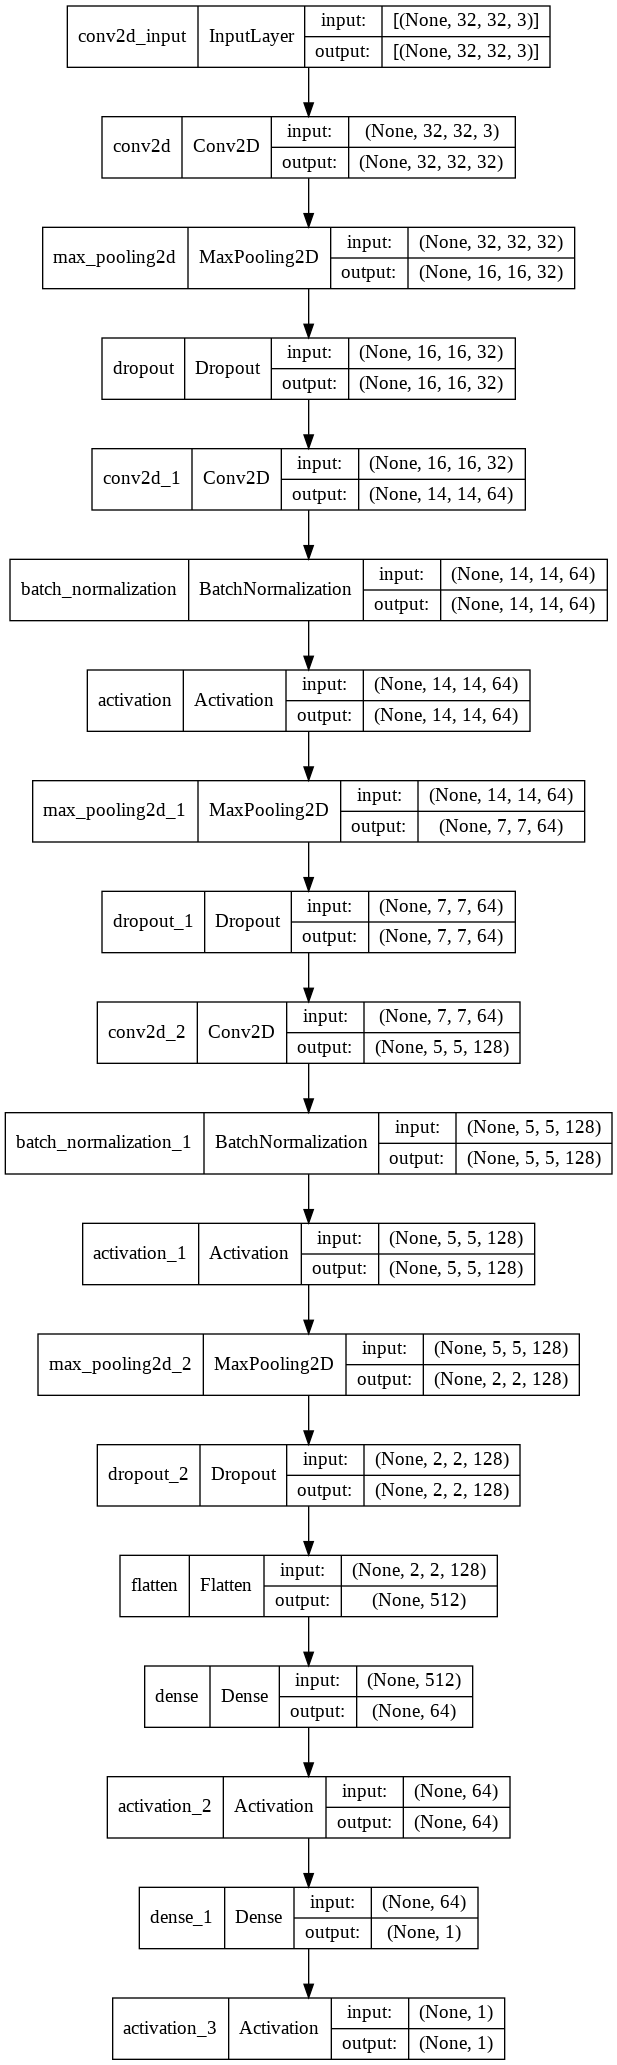

In [22]:
tensorflow.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [36]:
history = model.fit(images, Y_cal, epochs=50, batch_size=2 , verbose=1, validation_split=0.2, callbacks=[earlystopper])

Epoch 1/50
200/200 [==============================] - 3s 14ms/step - loss: 22.4783 - mean_squared_error: 22.4783 - val_loss: 47.5546 - val_mean_squared_error: 47.5546
Epoch 2/50
200/200 [==============================] - 2s 12ms/step - loss: 9.9130 - mean_squared_error: 9.9130 - val_loss: 10.2560 - val_mean_squared_error: 10.2560
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 10.3709 - mean_squared_error: 10.3709 - val_loss: 7.6194 - val_mean_squared_error: 7.6194
Epoch 4/50
200/200 [==============================] - 3s 13ms/step - loss: 10.0750 - mean_squared_error: 10.0750 - val_loss: 14.2013 - val_mean_squared_error: 14.2013
Epoch 5/50
200/200 [==============================] - 2s 12ms/step - loss: 9.7090 - mean_squared_error: 9.7090 - val_loss: 7.5504 - val_mean_squared_error: 7.5504
Epoch 6/50
200/200 [==============================] - 2s 12ms/step - loss: 8.4311 - mean_squared_error: 8.4311 - val_loss: 7.1825 - val_mean_squared_error: 7.1825
Epoch 7/50

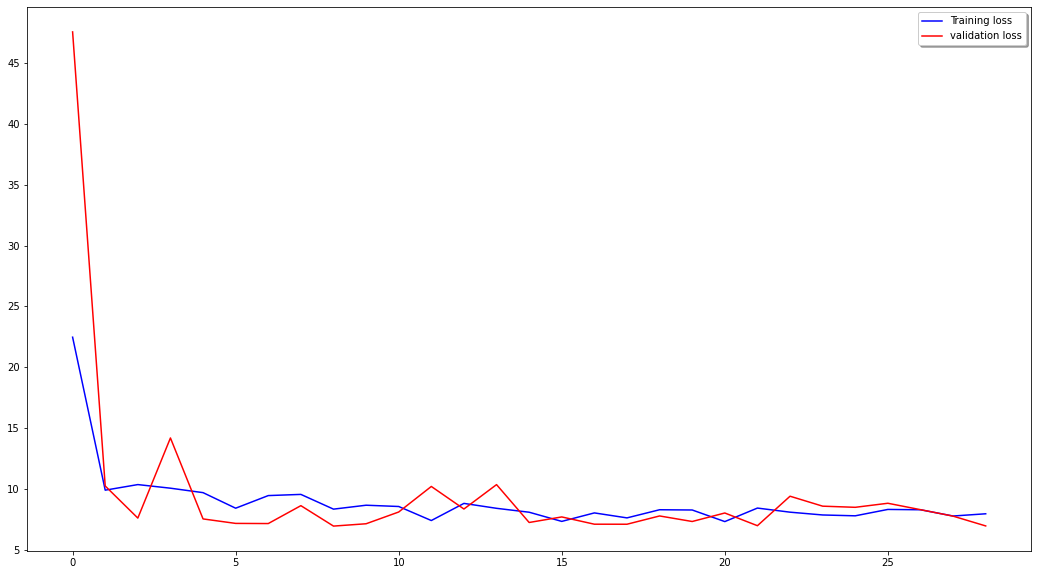

In [37]:
# Plot the loss and accuracy curves for training and validation 
fig2, ax2 = plt.subplots(1,1, figsize=(18, 10))
ax2.plot(history.history['loss'], color='b', label="Training loss")
ax2.plot(history.history['val_loss'], color='r', label="validation loss",axes =ax2)
legend = ax2.legend(loc='best', shadow=True)


In [38]:
#loading the final image for prediction dataset

images_pred = np.load("/content/drive/MyDrive/img_np_pred.npy")

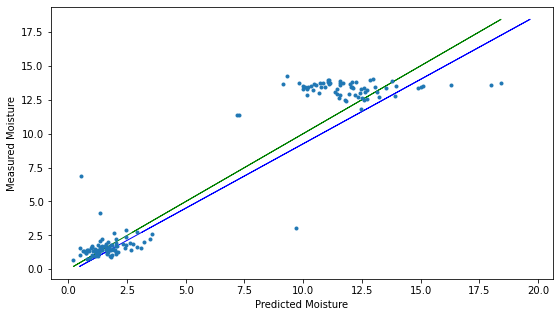

In [39]:

score = model.evaluate(images_pred, Y_pred, verbose=0)
pred_val = model.predict(images_pred)
z = np.polyfit(Y_pred, pred_val, 1)
sqrt(mean_squared_error (Y_pred, pred_val))
fig, ax = plt.subplots(figsize=(9, 5))
#Plot the best fit line
ax.plot(np.polyval(z,Y_pred), Y_pred, c='blue', linewidth=1)
#Plot the ideal 1:1 line
ax.plot(Y_pred, Y_pred, color='green', linewidth=1)
plt.xlabel('Predicted Moisture')
plt.ylabel('Measured Moisture')
plt.plot(Y_pred, pred_val, '.')